In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\talha\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\talha\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\talha\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\talha\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\Users\talha\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\Users\talha\AppData\Local\Programs\Python\Python39\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\talha\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\talha\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py

AttributeError: _ARRAY_API not found

In [2]:
df=pd.read_csv("Data_sets\9-email_classification_svm.csv")

In [3]:
df.head()

,subject_formality_score,sender_relationship_score,email_type
0,-1.496790,0.779258,0
1,-1.217610,0.889601,0
2,-0.375945,-0.823324,1
3,0.639609,-0.362827,1
4,-1.342836,-1.040502,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_formality_score    1000 non-null   float64
 1   sender_relationship_score  1000 non-null   float64
 2   email_type                 1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [5]:
df.head()

,subject_formality_score,sender_relationship_score,email_type
0,-1.496790,0.779258,0
1,-1.217610,0.889601,0
2,-0.375945,-0.823324,1
3,0.639609,-0.362827,1
4,-1.342836,-1.040502,1


In [6]:
df.columns

Index(['subject_formality_score', 'sender_relationship_score', 'email_type'], dtype='object')

In [7]:
df.describe()<

SyntaxError: invalid syntax (<ipython-input-7-bf3e4ea31558>, line 1)

In [8]:
df.describe()

,subject_formality_score,sender_relationship_score,email_type
count,1000.000000,1000.000000,1000.000000
mean,-1.009046,-0.006300,0.498000
std,0.654219,1.059501,0.500246
min,-3.532770,-2.218219,0.000000
25%,-1.252867,-1.006076,0.000000
50%,-0.994760,0.439233,0.000000
75%,-0.754839,0.994943,1.000000
max,2.180933,1.699497,1.000000


In [9]:
df.isnull().sum()

subject_formality_score      0
sender_relationship_score    0
email_type                   0
dtype: int64

<Axes: xlabel='subject_formality_score', ylabel='sender_relationship_score'>

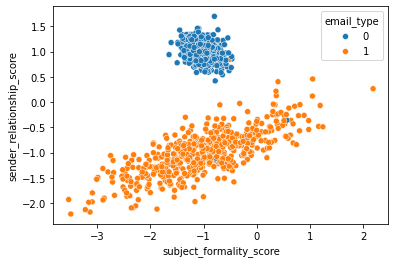

In [10]:
sns.scatterplot(x=df["subject_formality_score"],y=df["sender_relationship_score"],hue=df['email_type'])

In [11]:
df["email_type"].value_counts()

email_type
0    502
1    498
Name: count, dtype: int64

In [12]:
X=df.drop("email_type",axis=1)


In [13]:
y=df["email_type"]

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [15]:
X_train

,subject_formality_score,sender_relationship_score
846,-1.076655,0.943601
969,-1.062554,1.148473
191,-0.904298,1.049447
711,-1.283609,-1.171544
967,-1.097239,1.388281
...,...,...
887,-1.153241,1.241387
645,-0.964472,1.235402
908,-0.862866,1.110327
757,-1.124572,0.967717


In [16]:
from sklearn.svm import SVC


In [17]:
svc=SVC(kernel='linear')

In [18]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [19]:
y_pred=svc.predict(X_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix

In [21]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       0.99      1.00      1.00       132

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[117   1]
 [  0 132]]


In [22]:
rbf=SVC(kernel="rbf")

In [23]:
rbf.fit(X_train,y_train)
y_pred=rbf.predict(X_test)

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       0.99      1.00      1.00       132

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250



In [25]:
df=pd.read_csv("Data_sets\9-loan_risk_svm.csv")

In [26]:
df

,credit_score_fluctuation,recent_transaction_volume,loan_risk
0,-1.439860,1.283010,1
1,-0.276571,-1.232382,0
2,1.312047,0.955097,1
3,1.020706,0.089485,0
4,1.513729,0.580520,1
...,...,...,...
995,-0.703085,0.760777,1
996,1.042496,-1.257339,0
997,-0.187788,1.261660,1
998,-0.661871,-0.540731,0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   credit_score_fluctuation   1000 non-null   float64
 1   recent_transaction_volume  1000 non-null   float64
 2   loan_risk                  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [28]:
df.describe()

,credit_score_fluctuation,recent_transaction_volume,loan_risk
count,1000.000000,1000.000000,1000.000000
mean,-0.024200,-0.018748,0.504000
std,1.257080,1.222329,0.500234
min,-3.562160,-2.641815,0.000000
25%,-1.001007,-0.995190,0.000000
50%,-0.105200,-0.142727,1.000000
75%,1.007451,0.964210,1.000000
max,2.984892,3.338639,1.000000


In [29]:
df.isnull().sum()

credit_score_fluctuation     0
recent_transaction_volume    0
loan_risk                    0
dtype: int64

<Axes: xlabel='credit_score_fluctuation', ylabel='recent_transaction_volume'>

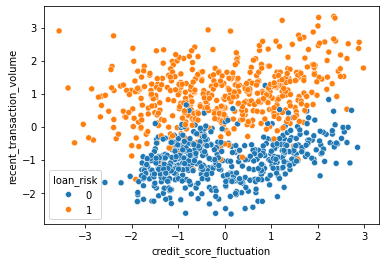

In [30]:
sns.scatterplot(x=df["credit_score_fluctuation"],y=df["recent_transaction_volume"],hue=df["loan_risk"])

In [31]:
X=df.drop("loan_risk",axis=1)
y=df["loan_risk"]


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [33]:
linear=SVC(kernel="linear")
linear.fit(X_train,y_train)
y_pred3=linear.predict(X_test)

print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))


              precision    recall  f1-score   support

           0       0.92      0.90      0.91       121
           1       0.91      0.93      0.92       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[109  12]
 [  9 120]]


In [35]:
rbf=SVC(kernel="rbf")
rbf.fit(X_train,y_train)
y_pred4=rbf.predict(X_test)

print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       121
           1       0.94      0.91      0.93       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250

[[113   8]
 [ 11 118]]


In [36]:
poly=SVC(kernel="poly")
poly.fit(X_train,y_train)
y_pred5=poly.predict(X_test)

print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))


              precision    recall  f1-score   support

           0       0.93      0.88      0.91       121
           1       0.90      0.94      0.92       129

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

[[107  14]
 [  8 121]]


In [37]:
sigmoid=SVC(kernel="sigmoid")
sigmoid.fit(X_train,y_train)
y_pred6=sigmoid.predict(X_test)

print(classification_report(y_test,y_pred6))
print(confusion_matrix(y_test,y_pred6))


              precision    recall  f1-score   support

           0       0.83      0.81      0.82       121
           1       0.83      0.84      0.84       129

    accuracy                           0.83       250
   macro avg       0.83      0.83      0.83       250
weighted avg       0.83      0.83      0.83       250

[[ 98  23]
 [ 20 109]]


In [38]:
 #hyperparameter tuning

In [39]:
param_grid={
    "C":[0.1,1,10,100,1000],
    "kernel":["rbf","linear","poly"],
    "gamma":["scale","auto"]
}



In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
grid=GridSearchCV(SVC(),param_grid=param_grid,cv=5)
grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'linear', 'poly']})

In [42]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [48]:
rbf_personal=SVC(C=10,gamma="scale",kernel="rbf")
rbf_personal.fit(X_train,y_train)
y_pred7=rbf_personal.predict(X_test)

In [51]:
print(classification_report(y_test,y_pred7))



              precision    recall  f1-score   support

           0       0.92      0.93      0.92       121
           1       0.93      0.92      0.93       129

    accuracy                           0.92       250
   macro avg       0.92      0.92      0.92       250
weighted avg       0.92      0.92      0.92       250



In [50]:
confusion_matrix(y_test,y_pred7)

array([[112,   9],
       [ 10, 119]])

In [52]:
df=pd.read_csv("Data_sets\9-seismic_activity_svm.csv")

In [53]:
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
0,9.539392,-3.000000,0
1,9.558241,-2.939394,0
2,9.576669,-2.878788,0
3,9.594678,-2.818182,0
4,9.612272,-2.757576,0


In [ ]:
#manuel rbd kernel

In [54]:
df.columns

Index(['underground_wave_energy', 'vibration_axis_variation',
       'seismic_event_detected'],
      dtype='object')

In [56]:
df["underground_wave_energy**2"]=df["underground_wave_energy"]**2
df["vibration_axis_variation**2"]=df["vibration_axis_variation"]**2
df["vibration_axis_variation*underground_wave_energy"]=df["vibration_axis_variation"]*df["underground_wave_energy"]

In [57]:
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected,underground_wave_energy**2,vibration_axis_variation**2,vibration_axis_variation*underground_wave_energy
0,9.539392,-3.000000,0,91.000000,9.000000,-28.618176
1,9.558241,-2.939394,0,91.359963,8.640037,-28.095434
2,9.576669,-2.878788,0,91.712580,8.287420,-27.569197
3,9.594678,-2.818182,0,92.057851,7.942149,-27.039548
4,9.612272,-2.757576,0,92.395776,7.604224,-26.506569


In [58]:
X=df.drop("seismic_event_detected",axis=1)
y=df["seismic_event_detected"]

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [61]:
import plotly.express as px

In [63]:
fig=px.scatter_3d(df,x="underground_wave_energy**2",y="vibration_axis_variation**2",z="vibration_axis_variation*underground_wave_energy",color="seismic_event_detected")
fig.show()

In [65]:
linear=SVC(kernel="linear")
linear.fit(X_train,y_train)
y_pred8=linear.predict(X_test)
print(classification_report(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       1.00      1.00      1.00        52

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

[[48  0]
 [ 0 52]]


In [66]:
#automatic rbf

In [67]:
df=pd.read_csv("Data_sets\9-seismic_activity_svm.csv")
X=df.drop("seismic_event_detected",axis=1)
y=df["seismic_event_detected"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=15)

In [70]:
linear=SVC(kernel="linear")
linear.fit(X_train,y_train)
y_pred8=linear.predict(X_test)
print(classification_report(y_test,y_pred8))
print(confusion_matrix(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        48
           1       0.00      0.00      0.00        52

    accuracy                           0.48       100
   macro avg       0.24      0.50      0.32       100
weighted avg       0.23      0.48      0.31       100

[[48  0]
 [52  0]]


c:\Users\talha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\talha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\talha\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

